# Social Media Analytics

In [2]:
import tweepy
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
import spacy
from spacy import displacy

In [1]:
api_key = "GR39zsBS7MwqwNheawLqVoETY"
api_secret = "dDy1bxnXqppMgsSHI4nyIJTK9IEfqTXXw90Yx83Cghllc1CLlw"
access_token = "857530568-IA485JGrKmHwyuvZBTL8bovHm23E0NeJIM9kQAhQ"
access_token_secret = "6zt7jdcWiCMOmescdDJYijMJ5FIigz89C5CWQVuNixcIG"

In [3]:
authenticator = tweepy.OAuthHandler(api_key,api_secret)
authenticator.set_access_token(access_token,access_token_secret)
api = tweepy.API(authenticator)

In [43]:
tweetdata = api.search(q='jio',count=50,tweet_mode="full_text")

In [44]:
cleantw = []
sentiments = []
for tw in tweetdata:
    tw = tw.text
    tw = re.sub("RT","",tw) # removing RT from each tweet
    tw = re.sub("@[a-zA-Z0-9_.:]+","",tw)# removing twitter handles
    tw = re.sub("http[a-zA-Z0-9.\/\\-\%\:]+","",tw)# remove URLs
    tw = re.sub("&amp;","",tw)
    print(tw)
    if len(tw)>5:
        tw = TextBlob(tw)
        try:
            if tw.detect_language()!='en':
                tw = tw.translate(to='en')
                print(tw)
        except:
            print("not translated")
        cleantw.append(tw.raw)
        if tw.sentiment.polarity>+0.1:
            print("positive")
            sentiments.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("negative")
            sentiments.append("Negative")
        else:
            print("Neutral")
            sentiments.append("Neutral")
        
        print("******************************")

There are so many reasons to #WatchMimiWithFamily but you have already heard enough😉

Watch #Mimi on  … 
positive
******************************
Jio SIM 2 minute ke down thi kya?
Jio SIM 2 minute key down thi kya?
Neutral
******************************
 HEy!! i think jio will use any one of personal email to get alert of another user i am feedup with the ema… 
Neutral
******************************
I want open jio payment bank account
Neutral
******************************
 Jio fibre   jio company वाले चोर गिरोह है आज दस महीने हो गए लेकिन मेरी सिक्योरिटी के २५०० सौ रुपये नहीं… 
Jio fiber is a thief gang with jio company, today it has been ten months but my security is not 2500 hundred rupees…
Neutral
******************************
 JIO has a great network across India even in the villages with the cheapest price, that will be ben… 
positive
******************************
  Tech Talks #1508 - Micromax In 2b, Micromax TWS, Z Flip 3 Case, Jio Vs AirTel, BGMI Prize, P50 Pro
…
Neutral
*****

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


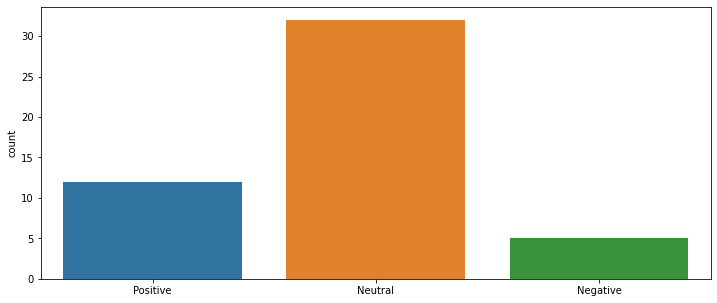

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(sentiments)
plt.show()

## Wordcloud Analysis

In [47]:
df = pd.DataFrame({"tweets":cleantw,"sents":sentiments})
df.head()

,tweets,sents
0,There are so many reasons to #WatchMimiWithFam...,Positive
1,Jio SIM 2 minute key down thi kya?,Neutral
2,HEy!! i think jio will use any one of persona...,Neutral
3,I want open jio payment bank account,Neutral
4,"Jio fiber is a thief gang with jio company, to...",Neutral


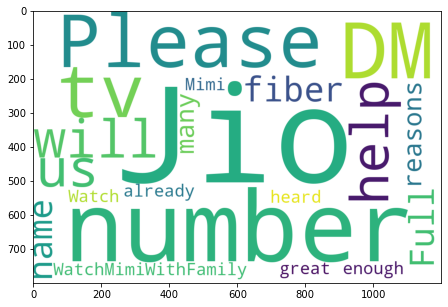

In [48]:
pdata = df.tweets[df.sents=="Positive"].tolist()
wd = wordcloud.WordCloud(max_words=20,background_color='white',width=1200,
                        height=800).generate_from_text(" ".join(pdata))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

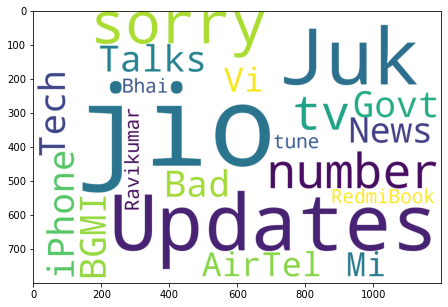

In [49]:
ndata = df.tweets[df.sents=="Negative"].tolist()
wd = wordcloud.WordCloud(max_words=20,background_color='white',width=1200,
                        height=800).generate_from_text(" ".join(ndata))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

## NER Analysis

In [50]:
nlp = spacy.load("en_core_web_sm")

In [52]:
for tw in pdata:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

C:\Users\anshu\anaconda3\lib\site-packages\spacy\displacy\__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [53]:
for tw in ndata:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

In [59]:
for e in doc.ents:
    print(e,e.label_)

jay PERSON
jio ORG


## Working with textblob

In [22]:
data= TextBlob("Hello Everyone, I hope you are doing good today.")

In [23]:
data.detect_language()

'en'

In [24]:
data.translate(to='hi')

TextBlob("सभी को नमस्कार, मुझे आशा है कि आप आज अच्छा कर रहे हैं।")

In [25]:
data.translate(to='ta')

TextBlob("அனைவருக்கும் வணக்கம், நீங்கள் இன்று நன்றாக இருக்கிறீர்கள் என்று நம்புகிறேன்.")

In [26]:
data.translate(to='te')

TextBlob("అందరికీ నమస్కారం, మీరు ఈరోజు మంచి పని చేస్తున్నారని ఆశిస్తున్నాను.")

In [27]:
data.translate(to='ar')

TextBlob("مرحباً بالجميع ، أتمنى أن تكونوا بخير اليوم.")

In [29]:
data.translate(to='Zh-Cn')

TextBlob("大家好，我希望你今天过得很好。")

In [30]:
data=TextBlob("The movie was amazing and i love such movies.")
data.sentiment.polarity

0.3666666666666667

In [31]:
data=TextBlob("The movie was awesome and i love such movies.")
data.sentiment.polarity

0.5

In [32]:
data=TextBlob("The movie was bad and i love such movies.")
data.sentiment.polarity

-0.06666666666666661

In [35]:
data=TextBlob("The movie was bad and i hate such movies.")
data.sentiment.polarity

-0.5

In [36]:
data=TextBlob("The movie was worst and i hate such movies.")
data.sentiment.polarity

-0.6